In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글폰트 깨짐 방지

from matplotlib import font_manager, rc

font_path = '../visualization/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

# 마이너스 부호 깨짐 방지
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


In [3]:
pd.read_csv('../../data_add/02. crime_in_Seoul.csv', thousands = ',', encoding = 'cp949')

# thousands = ',' : 숫자값을 문자로 인식할 수 있어서 설정함

,구분,죄종,발생검거,건수
0,중부,살인,발생,2.0
1,중부,살인,검거,2.0
2,중부,강도,발생,3.0
3,중부,강도,검거,3.0
4,중부,강간,발생,141.0
...,...,...,...,...
65529,NaN,NaN,NaN,NaN
65530,NaN,NaN,NaN,NaN
65531,NaN,NaN,NaN,NaN
65532,NaN,NaN,NaN,NaN


In [4]:
crime_raw_data = pd.read_csv('../../data_add/02. crime_in_Seoul.csv', thousands = ',', encoding = 'cp949')
crime_raw_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,2.0
1,중부,살인,검거,2.0
2,중부,강도,발생,3.0
3,중부,강도,검거,3.0
4,중부,강간,발생,141.0


In [5]:
# 탐색적 데이터 분석(EDA)

crime_raw_data.dtypes

구분       object
죄종       object
발생검거     object
건수      float64
dtype: object

In [6]:
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65534 entries, 0 to 65533
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분      310 non-null    object 
 1   죄종      310 non-null    object 
 2   발생검거    310 non-null    object 
 3   건수      310 non-null    float64
dtypes: float64(1), object(3)
memory usage: 2.0+ MB


In [7]:
crime_raw_data['죄종'].unique()

array(['살인', '강도', '강간', '절도', '폭력', nan], dtype=object)

In [8]:
condition = crime_raw_data['죄종'].notnull()
crime_raw_data = crime_raw_data[condition]
crime_raw_data

,구분,죄종,발생검거,건수
0,중부,살인,발생,2.0
1,중부,살인,검거,2.0
2,중부,강도,발생,3.0
3,중부,강도,검거,3.0
4,중부,강간,발생,141.0
...,...,...,...,...
305,수서,강간,검거,144.0
306,수서,절도,발생,1149.0
307,수서,절도,검거,789.0
308,수서,폭력,발생,1666.0


In [9]:
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 309
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분      310 non-null    object 
 1   죄종      310 non-null    object 
 2   발생검거    310 non-null    object 
 3   건수      310 non-null    float64
dtypes: float64(1), object(3)
memory usage: 12.1+ KB


서울시 범죄 현황 데이터 정리

In [10]:
crime_raw_data.pivot_table(
    crime_raw_data,
    index = '구분',
    columns = ['죄종','발생검거'],
    aggfunc = [np.sum]
)

sum                                                               
         건수                                                               
죄종       강간           강도          살인            절도              폭력        
발생검거     검거     발생    검거    발생    검거    발생      검거      발생      검거      발생
구분                                                                        
강남    269.0  339.0  26.0  24.0   3.0   3.0  1129.0  2438.0  2096.0  2336.0
강동    152.0  160.0  13.0  14.0   5.0   4.0   902.0  1754.0  2201.0  2530.0
강북    159.0  217.0   4.0   5.0   6.0   7.0   672.0  1222.0  2482.0  2778.0
강서    239.0  275.0  10.0  10.0  10.0   9.0  1070.0  1952.0  2768.0  3204.0
관악    264.0  322.0  10.0  12.0   7.0   6.0   937.0  2103.0  2707.0  3235.0
광진    234.0  279.0   6.0  11.0   4.0   4.0  1057.0  2636.0  2011.0  2392.0
구로    181.0  273.0  13.0  10.0   9.0   9.0   861.0  1910.0  2680.0  3164.0
금천    143.0  175.0   7.0   7.0   6.0   6.0   654.0  1264.0  1946.0  2193.0
남대문    52.0   57.0   4.0   5.0   1.0   1.0   429.0   946.0   832.0   890.0
노원    142.0  159.0   9.0   6.0   6.0   5.0   740.0  1857.0  2124.0  2516.0
도봉    121.0  123.0   5.0   5.0   3.0   3.0   492.0   866.0  1309.0  1441.0
동대문   158.0  190.0  12.0  10.0   5.0   5.0  1071.0  1940.0  2377.0  2642.0
동작    149.0  325.0   7.0   7.0   6.0   8.0   554.0  1226.0  1444.0  1661.0
마포    320.0  399.0   7.0   4.0   4.0   4.0   940.0  2527.0  2500.0  2939.0
방배     51.0   78.0   5.0   4.0   1.0   1.0   293.0   472.0   446.0   500.0
서대문   147.0  175.0   4.0   5.0   7.0   6.0   752.0  1503.0  1644.0  1976.0
서부     49.0   54.0   2.0   4.0   4.0   4.0   389.0   781.0   980.0  1128.0
서초    220.0  350.0   5.0   9.0   4.0   4.0   814.0  1733.0  1583.0  1838.0
성동     78.0  104.0   5.0   3.0   5.0   4.0   896.0  1296.0  1408.0  1619.0
성북     75.0  103.0   3.0   3.0   2.0   2.0   381.0   790.0  1004.0  1176.0
송파    184.0  234.0  12.0  15.0   8.0   9.0  1048.0  2543.0  2808.0  3289.0
수서    144.0  177.0  16.0  15.0   2.0   2.0   789.0  1149.0  1431.0  1666.0
양천    108.0  131.0   7.0   7.0   5.0   5.0   755.0  1719.0  1918.0  2250.0
영등포   225.0  356.0  14.0  19.0  13.0  13.0   940.0  2341.0  3007.0  3593.0
용산    214.0  251.0  10.0   9.0   4.0   4.0   599.0  1489.0  2008.0  2384.0
은평     93.0  102.0   5.0   5.0   2.0   2.0   501.0   885.0  1328.0  1536.0
종로    113.0  137.0   3.0   6.0   0.0   4.0   389.0   952.0  1135.0  1291.0
종암     42.0   51.0   5.0   5.0   1.0   2.0   344.0   680.0   815.0   932.0
중랑    150.0  164.0  14.0  14.0   7.0   8.0  1052.0  1691.0  2712.0  3164.0
중부     96.0  141.0   3.0   3.0   2.0   2.0   485.0  1204.0  1164.0  1335.0
혜화     64.0  101.0   6.0   6.0   2.0   2.0   379.0   988.0   842.0   972.0

In [11]:
crime_station = crime_raw_data.pivot_table(
    crime_raw_data,
    index = '구분',
    columns = ['죄종','발생검거'],
    aggfunc = [np.sum]
)
crime_station.head()

sum                                                              
         건수                                                              
죄종       강간           강도          살인           절도              폭력        
발생검거     검거     발생    검거    발생    검거   발생      검거      발생      검거      발생
구분                                                                       
강남    269.0  339.0  26.0  24.0   3.0  3.0  1129.0  2438.0  2096.0  2336.0
강동    152.0  160.0  13.0  14.0   5.0  4.0   902.0  1754.0  2201.0  2530.0
강북    159.0  217.0   4.0   5.0   6.0  7.0   672.0  1222.0  2482.0  2778.0
강서    239.0  275.0  10.0  10.0  10.0  9.0  1070.0  1952.0  2768.0  3204.0
관악    264.0  322.0  10.0  12.0   7.0  6.0   937.0  2103.0  2707.0  3235.0

In [12]:
crime_station.columns

MultiIndex([('sum', '건수', '강간', '검거'),
            ('sum', '건수', '강간', '발생'),
            ('sum', '건수', '강도', '검거'),
            ('sum', '건수', '강도', '발생'),
            ('sum', '건수', '살인', '검거'),
            ('sum', '건수', '살인', '발생'),
            ('sum', '건수', '절도', '검거'),
            ('sum', '건수', '절도', '발생'),
            ('sum', '건수', '폭력', '검거'),
            ('sum', '건수', '폭력', '발생')],
           names=[None, None, '죄종', '발생검거'])

In [13]:
crime_station['sum', '건수', '강간', '검거'][:5]

구분
강남    269.0
강동    152.0
강북    159.0
강서    239.0
관악    264.0
Name: (sum, 건수, 강간, 검거), dtype: float64

In [14]:
# 다중 컬럼(multi_index) 특정 컬럼 제거 >> droplevel()

crime_station.columns.droplevel([0,1])

MultiIndex([('강간', '검거'),
            ('강간', '발생'),
            ('강도', '검거'),
            ('강도', '발생'),
            ('살인', '검거'),
            ('살인', '발생'),
            ('절도', '검거'),
            ('절도', '발생'),
            ('폭력', '검거'),
            ('폭력', '발생')],
           names=['죄종', '발생검거'])

In [15]:
crime_station.columns = crime_station.columns.droplevel([0,1])
crime_station

죄종       강간           강도          살인            절도              폭력        
발생검거     검거     발생    검거    발생    검거    발생      검거      발생      검거      발생
구분                                                                        
강남    269.0  339.0  26.0  24.0   3.0   3.0  1129.0  2438.0  2096.0  2336.0
강동    152.0  160.0  13.0  14.0   5.0   4.0   902.0  1754.0  2201.0  2530.0
강북    159.0  217.0   4.0   5.0   6.0   7.0   672.0  1222.0  2482.0  2778.0
강서    239.0  275.0  10.0  10.0  10.0   9.0  1070.0  1952.0  2768.0  3204.0
관악    264.0  322.0  10.0  12.0   7.0   6.0   937.0  2103.0  2707.0  3235.0
광진    234.0  279.0   6.0  11.0   4.0   4.0  1057.0  2636.0  2011.0  2392.0
구로    181.0  273.0  13.0  10.0   9.0   9.0   861.0  1910.0  2680.0  3164.0
금천    143.0  175.0   7.0   7.0   6.0   6.0   654.0  1264.0  1946.0  2193.0
남대문    52.0   57.0   4.0   5.0   1.0   1.0   429.0   946.0   832.0   890.0
노원    142.0  159.0   9.0   6.0   6.0   5.0   740.0  1857.0  2124.0  2516.0
도봉    121.0  123.0   5.0   5.0   3.0   3.0   492.0   866.0  1309.0  1441.0
동대문   158.0  190.0  12.0  10.0   5.0   5.0  1071.0  1940.0  2377.0  2642.0
동작    149.0  325.0   7.0   7.0   6.0   8.0   554.0  1226.0  1444.0  1661.0
마포    320.0  399.0   7.0   4.0   4.0   4.0   940.0  2527.0  2500.0  2939.0
방배     51.0   78.0   5.0   4.0   1.0   1.0   293.0   472.0   446.0   500.0
서대문   147.0  175.0   4.0   5.0   7.0   6.0   752.0  1503.0  1644.0  1976.0
서부     49.0   54.0   2.0   4.0   4.0   4.0   389.0   781.0   980.0  1128.0
서초    220.0  350.0   5.0   9.0   4.0   4.0   814.0  1733.0  1583.0  1838.0
성동     78.0  104.0   5.0   3.0   5.0   4.0   896.0  1296.0  1408.0  1619.0
성북     75.0  103.0   3.0   3.0   2.0   2.0   381.0   790.0  1004.0  1176.0
송파    184.0  234.0  12.0  15.0   8.0   9.0  1048.0  2543.0  2808.0  3289.0
수서    144.0  177.0  16.0  15.0   2.0   2.0   789.0  1149.0  1431.0  1666.0
양천    108.0  131.0   7.0   7.0   5.0   5.0   755.0  1719.0  1918.0  2250.0
영등포   225.0  356.0  14.0  19.0  13.0  13.0   940.0  2341.0  3007.0  3593.0
용산    214.0  251.0  10.0   9.0   4.0   4.0   599.0  1489.0  2008.0  2384.0
은평     93.0  102.0   5.0   5.0   2.0   2.0   501.0   885.0  1328.0  1536.0
종로    113.0  137.0   3.0   6.0   0.0   4.0   389.0   952.0  1135.0  1291.0
종암     42.0   51.0   5.0   5.0   1.0   2.0   344.0   680.0   815.0   932.0
중랑    150.0  164.0  14.0  14.0   7.0   8.0  1052.0  1691.0  2712.0  3164.0
중부     96.0  141.0   3.0   3.0   2.0   2.0   485.0  1204.0  1164.0  1335.0
혜화     64.0  101.0   6.0   6.0   2.0   2.0   379.0   988.0   842.0   972.0

In [16]:
crime_station.index

# 현재 index : 경찰서 이름



Index(['강남', '강동', '강북', '강서', '관악', '광진', '구로', '금천', '남대문', '노원', '도봉',
       '동대문', '동작', '마포', '방배', '서대문', '서부', '서초', '성동', '성북', '송파', '수서',
       '양천', '영등포', '용산', '은평', '종로', '종암', '중랑', '중부', '혜화'],
      dtype='object', name='구분')

In [17]:
# win, mac(intel)
# conda, install -c conda-forge googlemaps

# mac(ml)
# pip install googlemaps

In [18]:
import googlemaps

gmaps_key = '키를 입력하세요.'
gmaps = googlemaps.Client(key=gmaps_key)



In [19]:
gmaps.geocode('서울영등포경찰서', language = 'ko')

[{'address_components': [{'long_name': '６０８',
    'short_name': '６０８',
    'types': ['premise']},
   {'long_name': '국회대로',
    'short_name': '국회대로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '영등포구',
    'short_name': '영등포구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '150-043',
    'short_name': '150-043',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 영등포구 국회대로 608',
  'geometry': {'location': {'lat': 37.5260441, 'lng': 126.9008091},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.5273930802915,
     'lng': 126.9021580802915},
    'southwest': {'lat': 37.5246951197085, 'lng': 126.8994601197085}}},
  'partial_match': True,
  'place_id': 'ChIJ1TimJLaffDURptXOs0Tj6s

In [20]:
tmp = gmaps.geocode('서울영등포경찰서', language = 'ko')
len(tmp)

1

In [21]:
tmp[0].get('geometry')

{'location': {'lat': 37.5260441, 'lng': 126.9008091},
 'location_type': 'ROOFTOP',
 'viewport': {'northeast': {'lat': 37.5273930802915, 'lng': 126.9021580802915},
  'southwest': {'lat': 37.5246951197085, 'lng': 126.8994601197085}}}

In [22]:
type(tmp[0].get('geometry'))

dict

In [23]:
tmp[0].get('geometry')['location']

{'lat': 37.5260441, 'lng': 126.9008091}

In [24]:
tmp[0].get('geometry')['location']['lat']

37.5260441

In [25]:
tmp[0].get('geometry')['location']['lng']

126.9008091

In [26]:
tmp[0].get('formatted_address')

'대한민국 서울특별시 영등포구 국회대로 608'

In [27]:
tmp[0].get('formatted_address').split()

['대한민국', '서울특별시', '영등포구', '국회대로', '608']

In [28]:
tmp[0].get('formatted_address').split()[2]

'영등포구'

구별, lat, lng, 주소 컬럼

In [29]:
crime_station.head()

죄종       강간           강도          살인           절도              폭력        
발생검거     검거     발생    검거    발생    검거   발생      검거      발생      검거      발생
구분                                                                       
강남    269.0  339.0  26.0  24.0   3.0  3.0  1129.0  2438.0  2096.0  2336.0
강동    152.0  160.0  13.0  14.0   5.0  4.0   902.0  1754.0  2201.0  2530.0
강북    159.0  217.0   4.0   5.0   6.0  7.0   672.0  1222.0  2482.0  2778.0
강서    239.0  275.0  10.0  10.0  10.0  9.0  1070.0  1952.0  2768.0  3204.0
관악    264.0  322.0  10.0  12.0   7.0  6.0   937.0  2103.0  2707.0  3235.0

In [30]:
crime_station['구별'] = np.nan
crime_station['주소'] = np.nan
crime_station['lat'] = np.nan
crime_station['lng'] = np.nan

In [31]:
# 경찰서 이름에서 소속된 구 이름 얻기
# 구 이름과 위도, 경도 정보를 저장할 준비 하기
# 반복문 이용하여 전 NaN 채우기
# iterrows

In [32]:
# iterrows() 속도빠름

for idx, rows in crime_station.iterrows() :
    station_name = '서울' + str(idx) + '경찰서'
    tmp = gmaps.geocode(station_name, language = 'ko')
    
    # 구 정보 가져오기
    
    tmp_gu = tmp[0].get('formatted_address')
    
    # 위경도 좌표 가져오기
    
    lat = tmp[0].get('geometry')['location']['lat']
    lng = tmp[0].get('geometry')['location']['lng']
    
    # 만들어 놓은 열의 NaN값 채우기
    
    crime_station.loc[idx, 'lat'] = lat
    crime_station.loc[idx, 'lng'] = lng
    crime_station.loc[idx, '구별'] = tmp_gu.split()[2]
    crime_station.loc[idx, '주소'] = tmp_gu
    
    # loc을 활용하여 idx(행), (구별, lng, lng, 주소) 지정
  

In [33]:
# for idx in crime_station.index :
#     station_name = '서울' + str(idx) + '경찰서'
#     tmp = gmaps.geocode(station_name, language = 'ko')
    
#     # 구 정보 가져오기
    
#     tmp_gu = tmp[0].get('formatted_address')
    
#     # 위경도 좌표 가져오기
    
#     lat = tmp[0].get('geometry')['location']['lat']
#     lng = tmp[0].get('geometry')['location']['lng']
    
#     # 만들어 놓은 열의 NaN값 채우기
    
#     crime_station.loc[idx, 'lat'] = lat
#     crime_station.loc[idx, 'lng'] = lng
#     crime_station.loc[idx, '구별'] = tmp_gu.split()[2]
#     crime_station.loc[idx, '주소'] = tmp_gu
    
#     # loc을 활용하여 idx(행), (구별, lng, lng, 주소) 지정
#     count += 1
#     print(count)

In [34]:
crime_station.head()

죄종       강간           강도          살인           절도              폭력          \
발생검거     검거     발생    검거    발생    검거   발생      검거      발생      검거      발생   
구분                                                                          
강남    269.0  339.0  26.0  24.0   3.0  3.0  1129.0  2438.0  2096.0  2336.0   
강동    152.0  160.0  13.0  14.0   5.0  4.0   902.0  1754.0  2201.0  2530.0   
강북    159.0  217.0   4.0   5.0   6.0  7.0   672.0  1222.0  2482.0  2778.0   
강서    239.0  275.0  10.0  10.0  10.0  9.0  1070.0  1952.0  2768.0  3204.0   
관악    264.0  322.0  10.0  12.0   7.0  6.0   937.0  2103.0  2707.0  3235.0   

죄종     구별                          주소        lat         lng  
발생검거                                                          
구분                                                            
강남    강남구  대한민국 서울특별시 강남구 테헤란로114길 11  37.509435  127.066958  
강동    강동구       대한민국 서울특별시 강동구 성내로 57  37.528511  127.126822  
강북    강북구     대한민국 서울특별시 강북구 오패산로 406  37.637304  127.027340  
강서    양천구   대한민국 서울특별시 양천구 신월동 화곡로 73  37.539783  126.829997  
관악    관악구     대한민국 서울특별시 관악구 관악로5길 33  37.474395  126.951349

두 줄의 컬럼을 하나로 합치기

In [35]:
crime_station.columns

MultiIndex([( '강간', '검거'),
            ( '강간', '발생'),
            ( '강도', '검거'),
            ( '강도', '발생'),
            ( '살인', '검거'),
            ( '살인', '발생'),
            ( '절도', '검거'),
            ( '절도', '발생'),
            ( '폭력', '검거'),
            ( '폭력', '발생'),
            ( '구별',   ''),
            ( '주소',   ''),
            ('lat',   ''),
            ('lng',   '')],
           names=['죄종', '발생검거'])

In [36]:
crime_station.columns.get_level_values(0)

Index(['강간', '강간', '강도', '강도', '살인', '살인', '절도', '절도', '폭력', '폭력', '구별', '주소',
       'lat', 'lng'],
      dtype='object', name='죄종')

In [37]:
crime_station.columns.get_level_values(1)

Index(['검거', '발생', '검거', '발생', '검거', '발생', '검거', '발생', '검거', '발생', '', '', '',
       ''],
      dtype='object', name='발생검거')

In [38]:
crime_station.columns.get_level_values(0)[2]

'강도'

In [39]:
crime_station.columns.get_level_values(1)[2]

'검거'

In [40]:
crime_station.columns.get_level_values(0)[2] + crime_station.columns.get_level_values(1)[2]

'강도검거'

In [41]:
print(len(crime_station.columns.get_level_values(0)))
print(len(crime_station.columns.get_level_values(1)))

14
14


In [42]:
tmp = [
    crime_station.columns.get_level_values(0)[n] + crime_station.columns.get_level_values(1)[n]
    
    for n in range(0, len(crime_station.columns.get_level_values(0)))
]

In [43]:
tmp

['강간검거',
 '강간발생',
 '강도검거',
 '강도발생',
 '살인검거',
 '살인발생',
 '절도검거',
 '절도발생',
 '폭력검거',
 '폭력발생',
 '구별',
 '주소',
 'lat',
 'lng']

In [44]:
crime_station.columns = tmp
crime_station.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구별,주소,lat,lng
구분,,,,,,,,,,,,,,
강남,269.0,339.0,26.0,24.0,3.0,3.0,1129.0,2438.0,2096.0,2336.0,강남구,대한민국 서울특별시 강남구 테헤란로114길 11,37.509435,127.066958
강동,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0,강동구,대한민국 서울특별시 강동구 성내로 57,37.528511,127.126822
강북,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0,강북구,대한민국 서울특별시 강북구 오패산로 406,37.637304,127.027340
강서,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0,양천구,대한민국 서울특별시 양천구 신월동 화곡로 73,37.539783,126.829997
관악,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0,관악구,대한민국 서울특별시 관악구 관악로5길 33,37.474395,126.951349


In [45]:
crime_station.to_csv('crime_in_Seoul_raw_new.csv',sep = ',', encoding = 'utf-8')

In [46]:
pd.read_csv('./crime_in_Seoul_raw_new.csv',index_col = 0)

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구별,주소,lat,lng
구분,,,,,,,,,,,,,,
강남,269.0,339.0,26.0,24.0,3.0,3.0,1129.0,2438.0,2096.0,2336.0,강남구,대한민국 서울특별시 강남구 테헤란로114길 11,37.509435,127.066958
강동,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0,강동구,대한민국 서울특별시 강동구 성내로 57,37.528511,127.126822
강북,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0,강북구,대한민국 서울특별시 강북구 오패산로 406,37.637304,127.027340
강서,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0,양천구,대한민국 서울특별시 양천구 신월동 화곡로 73,37.539783,126.829997
관악,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0,관악구,대한민국 서울특별시 관악구 관악로5길 33,37.474395,126.951349
광진,234.0,279.0,6.0,11.0,4.0,4.0,1057.0,2636.0,2011.0,2392.0,광진구,대한민국 서울특별시 광진구 구의동 자양로 167,37.542873,127.083821
구로,181.0,273.0,13.0,10.0,9.0,9.0,861.0,1910.0,2680.0,3164.0,구로구,대한민국 서울특별시 구로구 새말로 97,37.507043,126.890219
금천,143.0,175.0,7.0,7.0,6.0,6.0,654.0,1264.0,1946.0,2193.0,금천구,대한민국 서울특별시 금천구 시흥대로73길 50,37.456872,126.897043
남대문,52.0,57.0,4.0,5.0,1.0,1.0,429.0,946.0,832.0,890.0,중구,대한민국 서울특별시 중구 한강대로 410,37.554758,126.973498


In [47]:
crime_anal_station = pd.read_csv('./crime_in_Seoul_raw_new.csv',index_col = 0)
crime_anal_station.head(3)

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구별,주소,lat,lng
구분,,,,,,,,,,,,,,
강남,269.0,339.0,26.0,24.0,3.0,3.0,1129.0,2438.0,2096.0,2336.0,강남구,대한민국 서울특별시 강남구 테헤란로114길 11,37.509435,127.066958
강동,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0,강동구,대한민국 서울특별시 강동구 성내로 57,37.528511,127.126822
강북,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0,강북구,대한민국 서울특별시 강북구 오패산로 406,37.637304,127.027340


In [48]:
crime_anal_station['주소'][1].split()[2]

'강동구'

In [49]:
crime_station['주소'].str.split(' ').str.get(2)

구분
강남      강남구
강동      강동구
강북      강북구
강서      양천구
관악      관악구
광진      광진구
구로      구로구
금천      금천구
남대문      중구
노원      노원구
도봉      도봉구
동대문    동대문구
동작      동작구
마포      마포구
방배      서초구
서대문    서대문구
서부      은평구
서초      서초구
성동      성동구
성북      성북구
송파      송파구
수서      강남구
양천      양천구
영등포    영등포구
용산      용산구
은평      은평구
종로      종로구
종암      성북구
중랑      중랑구
중부       중구
혜화      종로구
Name: 주소, dtype: object

In [50]:
pd.pivot_table(crime_anal_station,
               index = '구별',
               aggfunc = np.sum)

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_17224\253572518.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pd.pivot_table(crime_anal_station,


,lat,lng,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구별,,,,,,,,,,,,
강남구,75.002925,254.144170,413.0,516.0,42.0,39.0,5.0,5.0,1918.0,3587.0,3527.0,4002.0
강동구,37.528511,127.126822,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0
강북구,37.637304,127.027340,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0
관악구,37.474395,126.951349,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0
광진구,37.542873,127.083821,234.0,279.0,6.0,11.0,4.0,4.0,1057.0,2636.0,2011.0,2392.0
구로구,37.507043,126.890219,181.0,273.0,13.0,10.0,9.0,9.0,861.0,1910.0,2680.0,3164.0
금천구,37.456872,126.897043,143.0,175.0,7.0,7.0,6.0,6.0,654.0,1264.0,1946.0,2193.0
노원구,37.642139,127.071047,142.0,159.0,9.0,6.0,6.0,5.0,740.0,1857.0,2124.0,2516.0
도봉구,37.653359,127.052682,121.0,123.0,5.0,5.0,3.0,3.0,492.0,866.0,1309.0,1441.0


In [51]:
crime_anal_gu = pd.pivot_table(crime_anal_station,
               index = '구별',
               aggfunc = np.sum)
crime_anal_gu.head()

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_17224\4164434733.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  crime_anal_gu = pd.pivot_table(crime_anal_station,


,lat,lng,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구별,,,,,,,,,,,,
강남구,75.002925,254.144170,413.0,516.0,42.0,39.0,5.0,5.0,1918.0,3587.0,3527.0,4002.0
강동구,37.528511,127.126822,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0
강북구,37.637304,127.027340,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0
관악구,37.474395,126.951349,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0
광진구,37.542873,127.083821,234.0,279.0,6.0,11.0,4.0,4.0,1057.0,2636.0,2011.0,2392.0


In [52]:
del crime_anal_gu['lat']

crime_anal_gu

,lng,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구별,,,,,,,,,,,
강남구,254.144170,413.0,516.0,42.0,39.0,5.0,5.0,1918.0,3587.0,3527.0,4002.0
강동구,127.126822,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0
강북구,127.027340,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0
관악구,126.951349,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0
광진구,127.083821,234.0,279.0,6.0,11.0,4.0,4.0,1057.0,2636.0,2011.0,2392.0
구로구,126.890219,181.0,273.0,13.0,10.0,9.0,9.0,861.0,1910.0,2680.0,3164.0
금천구,126.897043,143.0,175.0,7.0,7.0,6.0,6.0,654.0,1264.0,1946.0,2193.0
노원구,127.071047,142.0,159.0,9.0,6.0,6.0,5.0,740.0,1857.0,2124.0,2516.0
도봉구,127.052682,121.0,123.0,5.0,5.0,3.0,3.0,492.0,866.0,1309.0,1441.0


In [53]:
crime_anal_gu.drop('lng', axis = 1, inplace = True)

crime_anal_gu.head(3)

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구별,,,,,,,,,,
강남구,413.0,516.0,42.0,39.0,5.0,5.0,1918.0,3587.0,3527.0,4002.0
강동구,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0
강북구,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0


In [54]:
# 새로운 변수 '검거율' 생성

crime_anal_gu['강간검거']/crime_anal_gu['강간발생']

구별
강남구     0.800388
강동구     0.950000
강북구     0.732719
관악구     0.819876
광진구     0.838710
구로구     0.663004
금천구     0.817143
노원구     0.893082
도봉구     0.983740
동대문구    0.831579
동작구     0.458462
마포구     0.802005
서대문구    0.840000
서초구     0.633178
성동구     0.750000
성북구     0.759740
송파구     0.786325
양천구     0.854680
영등포구    0.632022
용산구     0.852590
은평구     0.910256
종로구     0.743697
중구      0.747475
중랑구     0.914634
dtype: float64

In [55]:
# 다수의 컬럼을 다른 컬럼으로 나누기

crime_anal_gu[['강도검거', '살인검거']].div(crime_anal_gu['강도발생'], axis = 0)

,강도검거,살인검거
구별,,
강남구,1.076923,0.128205
강동구,0.928571,0.357143
강북구,0.800000,1.200000
관악구,0.833333,0.583333
광진구,0.545455,0.363636
구로구,1.300000,0.900000
금천구,1.000000,0.857143
노원구,1.500000,1.000000
도봉구,1.000000,0.600000


In [56]:
crime_anal_gu.columns

Index(['강간검거', '강간발생', '강도검거', '강도발생', '살인검거', '살인발생', '절도검거', '절도발생', '폭력검거',
       '폭력발생'],
      dtype='object')

In [57]:
num = ['강간검거', '강도검거', '살인검거', '절도검거', '폭력검거']
den = ['강간발생', '강도발생', '살인발생', '절도발생', '폭력발생']

crime_anal_gu[num].div(crime_anal_gu[den].values, axis = 0)


,강간검거,강도검거,살인검거,절도검거,폭력검거
구별,,,,,
강남구,0.800388,1.076923,1.000000,0.534709,0.881309
강동구,0.950000,0.928571,1.250000,0.514253,0.869960
강북구,0.732719,0.800000,0.857143,0.549918,0.893449
관악구,0.819876,0.833333,1.166667,0.445554,0.836785
광진구,0.838710,0.545455,1.000000,0.400986,0.840719
구로구,0.663004,1.300000,1.000000,0.450785,0.847029
금천구,0.817143,1.000000,1.000000,0.517405,0.887369
노원구,0.893082,1.500000,1.200000,0.398492,0.844197
도봉구,0.983740,1.000000,1.000000,0.568129,0.908397


In [58]:
crime_anal_gu[num].div(crime_anal_gu[den].values, axis = 0).columns

Index(['강간검거', '강도검거', '살인검거', '절도검거', '폭력검거'], dtype='object')

In [59]:
target = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

crime_anal_gu[target] = round(crime_anal_gu[num].div(crime_anal_gu[den].values, axis = 0)*100,2)

crime_anal_gu.head(3)

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,413.0,516.0,42.0,39.0,5.0,5.0,1918.0,3587.0,3527.0,4002.0,80.04,107.69,100.00,53.47,88.13
강동구,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0,95.00,92.86,125.00,51.43,87.00
강북구,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0,73.27,80.00,85.71,54.99,89.34


In [60]:
# 필요없는 컬럼 제거

crime_anal_gu.drop(['강간검거','강도검거','살인검거','절도검거','폭력검거'], axis =1, inplace = True)

crime_anal_gu.head()

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,80.04,107.69,100.00,53.47,88.13
강동구,160.0,14.0,4.0,1754.0,2530.0,95.00,92.86,125.00,51.43,87.00
강북구,217.0,5.0,7.0,1222.0,2778.0,73.27,80.00,85.71,54.99,89.34
관악구,322.0,12.0,6.0,2103.0,3235.0,81.99,83.33,116.67,44.56,83.68
광진구,279.0,11.0,4.0,2636.0,2392.0,83.87,54.55,100.00,40.10,84.07


In [61]:
condition = crime_anal_gu[target] > 100
crime_anal_gu[condition] = 100
crime_anal_gu

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,80.04,100.00,100.00,53.47,88.13
강동구,160.0,14.0,4.0,1754.0,2530.0,95.00,92.86,100.00,51.43,87.00
강북구,217.0,5.0,7.0,1222.0,2778.0,73.27,80.00,85.71,54.99,89.34
관악구,322.0,12.0,6.0,2103.0,3235.0,81.99,83.33,100.00,44.56,83.68
광진구,279.0,11.0,4.0,2636.0,2392.0,83.87,54.55,100.00,40.10,84.07
구로구,273.0,10.0,9.0,1910.0,3164.0,66.30,100.00,100.00,45.08,84.70
금천구,175.0,7.0,6.0,1264.0,2193.0,81.71,100.00,100.00,51.74,88.74
노원구,159.0,6.0,5.0,1857.0,2516.0,89.31,100.00,100.00,39.85,84.42
도봉구,123.0,5.0,3.0,866.0,1441.0,98.37,100.00,100.00,56.81,90.84


In [62]:
crime_anal_gu[target].clip(lower = 0, upper = 100) ## 최소값 0 최대값 100으로 바꿔줘

,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,
강남구,80.04,100.00,100.00,53.47,88.13
강동구,95.00,92.86,100.00,51.43,87.00
강북구,73.27,80.00,85.71,54.99,89.34
관악구,81.99,83.33,100.00,44.56,83.68
광진구,83.87,54.55,100.00,40.10,84.07
구로구,66.30,100.00,100.00,45.08,84.70
금천구,81.71,100.00,100.00,51.74,88.74
노원구,89.31,100.00,100.00,39.85,84.42
도봉구,98.37,100.00,100.00,56.81,90.84


In [63]:
# 컬럼 이름 바꾸기

crime_anal_gu.rename(columns = {'강간발생' : '강간', '강도발생' : '강도', 
                               '살인발생' : '살인', '절도발생' : '절도',  '폭력발생' : '폭력'}, inplace = True)

crime_anal_gu.head()


,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,80.04,100.00,100.00,53.47,88.13
강동구,160.0,14.0,4.0,1754.0,2530.0,95.00,92.86,100.00,51.43,87.00
강북구,217.0,5.0,7.0,1222.0,2778.0,73.27,80.00,85.71,54.99,89.34
관악구,322.0,12.0,6.0,2103.0,3235.0,81.99,83.33,100.00,44.56,83.68
광진구,279.0,11.0,4.0,2636.0,2392.0,83.87,54.55,100.00,40.10,84.07


범죄의 경중에 따른 발생건수의 차이가 크다.

강간 : 3자리수, 절도/폭력 : 4자리수, 살인 : 1자리수

>> 정규화 필요

In [64]:
# 정규화 최고값 1, 최소값 0

crime_anal_gu['강도']/crime_anal_gu['강도'].max()



구별
강남구     1.000000
강동구     0.358974
강북구     0.128205
관악구     0.307692
광진구     0.282051
구로구     0.256410
금천구     0.179487
노원구     0.153846
도봉구     0.128205
동대문구    0.256410
동작구     0.179487
마포구     0.102564
서대문구    0.128205
서초구     0.333333
성동구     0.076923
성북구     0.205128
송파구     0.384615
양천구     0.435897
영등포구    0.487179
용산구     0.230769
은평구     0.230769
종로구     0.307692
중구      0.205128
중랑구     0.358974
Name: 강도, dtype: float64

In [65]:
crime_anal_gu['강간'].sort_values(ascending = False)

구별
강남구     516.0
서초구     428.0
양천구     406.0
마포구     399.0
영등포구    356.0
동작구     325.0
관악구     322.0
광진구     279.0
구로구     273.0
용산구     251.0
종로구     238.0
송파구     234.0
강북구     217.0
중구      198.0
동대문구    190.0
서대문구    175.0
금천구     175.0
중랑구     164.0
강동구     160.0
노원구     159.0
은평구     156.0
성북구     154.0
도봉구     123.0
성동구     104.0
Name: 강간, dtype: float64

In [66]:
col = ['살인', '강도', '강간', '절도', '폭력']

crime_anal_gu[col]

,살인,강도,강간,절도,폭력
구별,,,,,
강남구,5.0,39.0,516.0,3587.0,4002.0
강동구,4.0,14.0,160.0,1754.0,2530.0
강북구,7.0,5.0,217.0,1222.0,2778.0
관악구,6.0,12.0,322.0,2103.0,3235.0
광진구,4.0,11.0,279.0,2636.0,2392.0
구로구,9.0,10.0,273.0,1910.0,3164.0
금천구,6.0,7.0,175.0,1264.0,2193.0
노원구,5.0,6.0,159.0,1857.0,2516.0
도봉구,3.0,5.0,123.0,866.0,1441.0


In [67]:
round(crime_anal_gu[col] / crime_anal_gu[col].max(),2)

,살인,강도,강간,절도,폭력
구별,,,,,
강남구,0.36,1.00,1.00,0.98,0.73
강동구,0.29,0.36,0.31,0.48,0.46
강북구,0.50,0.13,0.42,0.33,0.51
관악구,0.43,0.31,0.62,0.57,0.59
광진구,0.29,0.28,0.54,0.72,0.44
구로구,0.64,0.26,0.53,0.52,0.58
금천구,0.43,0.18,0.34,0.34,0.40
노원구,0.36,0.15,0.31,0.51,0.46
도봉구,0.21,0.13,0.24,0.24,0.26


In [68]:
crime_anal_norm = round(crime_anal_gu[col] / crime_anal_gu[col].max(),2)

crime_anal_gu.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,80.04,100.00,100.00,53.47,88.13
강동구,160.0,14.0,4.0,1754.0,2530.0,95.00,92.86,100.00,51.43,87.00
강북구,217.0,5.0,7.0,1222.0,2778.0,73.27,80.00,85.71,54.99,89.34
관악구,322.0,12.0,6.0,2103.0,3235.0,81.99,83.33,100.00,44.56,83.68
광진구,279.0,11.0,4.0,2636.0,2392.0,83.87,54.55,100.00,40.10,84.07


In [69]:
crime_anal_gu.columns

Index(['강간', '강도', '살인', '절도', '폭력', '강간검거율', '강도검거율', '살인검거율', '절도검거율',
       '폭력검거율'],
      dtype='object')

In [70]:
col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율',
       '폭력검거율']

crime_anal_gu[col2]

,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,
강남구,80.04,100.00,100.00,53.47,88.13
강동구,95.00,92.86,100.00,51.43,87.00
강북구,73.27,80.00,85.71,54.99,89.34
관악구,81.99,83.33,100.00,44.56,83.68
광진구,83.87,54.55,100.00,40.10,84.07
구로구,66.30,100.00,100.00,45.08,84.70
금천구,81.71,100.00,100.00,51.74,88.74
노원구,89.31,100.00,100.00,39.85,84.42
도봉구,98.37,100.00,100.00,56.81,90.84


In [71]:
crime_anal_norm[col2] = crime_anal_gu[col2]
crime_anal_norm

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,0.36,1.00,1.00,0.98,0.73,80.04,100.00,100.00,53.47,88.13
강동구,0.29,0.36,0.31,0.48,0.46,95.00,92.86,100.00,51.43,87.00
강북구,0.50,0.13,0.42,0.33,0.51,73.27,80.00,85.71,54.99,89.34
관악구,0.43,0.31,0.62,0.57,0.59,81.99,83.33,100.00,44.56,83.68
광진구,0.29,0.28,0.54,0.72,0.44,83.87,54.55,100.00,40.10,84.07
구로구,0.64,0.26,0.53,0.52,0.58,66.30,100.00,100.00,45.08,84.70
금천구,0.43,0.18,0.34,0.34,0.40,81.71,100.00,100.00,51.74,88.74
노원구,0.36,0.15,0.31,0.51,0.46,89.31,100.00,100.00,39.85,84.42
도봉구,0.21,0.13,0.24,0.24,0.26,98.37,100.00,100.00,56.81,90.84


In [72]:
# 구별 cctv 자료에서 인구수와 cctv수 추가

pd.read_csv('../../data_add//01. CCTV_result.csv', index_col = '구별')

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358,-544.642322
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352,-598.750923
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854,464.799395
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833,-600.988527
구로구,1884,64.973730,441559,410742,30817,58794,6.979135,13.315095,0.426670,328.023808
금천구,1348,100.000000,253491,235154,18337,34170,7.233787,13.479769,0.531774,1.072426
노원구,1566,188.929889,558075,554403,3672,74243,0.657976,13.303409,0.280607,-119.490564


In [73]:
result_cctv = pd.read_csv('../../data_add//01. CCTV_result.csv', index_col = '구별')
result_cctv.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358,-544.642322
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352,-598.750923
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854,464.799395


In [74]:
result_cctv[['인구수', '소계']]

,인구수,소계
구별,,
강남구,561052,3238
강동구,440359,1010
강북구,328002,831
강서구,608255,911
관악구,520929,2109
광진구,372298,878
구로구,441559,1884
금천구,253491,1348
노원구,558075,1566


In [75]:
crime_anal_norm[['인구수', 'CCTV']] = result_cctv[['인구수', '소계']]

crime_anal_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,0.36,1.00,1.00,0.98,0.73,80.04,100.00,100.00,53.47,88.13,561052,3238
강동구,0.29,0.36,0.31,0.48,0.46,95.00,92.86,100.00,51.43,87.00,440359,1010
강북구,0.50,0.13,0.42,0.33,0.51,73.27,80.00,85.71,54.99,89.34,328002,831
관악구,0.43,0.31,0.62,0.57,0.59,81.99,83.33,100.00,44.56,83.68,520929,2109
광진구,0.29,0.28,0.54,0.72,0.44,83.87,54.55,100.00,40.10,84.07,372298,878


정규화된 범죄 발생 건수 전체 평균을 구함 >> 범죄 columns의 대표값으로 사용하고자 함

In [76]:
col = ['강간', '강도', '살인', '절도', '폭력']

np.mean(crime_anal_norm[col], axis = 1)

구별
강남구     0.814
강동구     0.380
강북구     0.378
관악구     0.504
광진구     0.454
구로구     0.506
금천구     0.338
노원구     0.358
도봉구     0.216
동대문구    0.400
동작구     0.402
마포구     0.478
서대문구    0.334
서초구     0.510
성동구     0.244
성북구     0.318
송파구     0.552
양천구     0.846
영등포구    0.682
용산구     0.372
은평구     0.380
종로구     0.428
중구      0.360
중랑구     0.458
dtype: float64

In [77]:
crime_anal_norm['범죄'] = np.mean(crime_anal_norm[col], axis = 1)

crime_anal_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,0.36,1.00,1.00,0.98,0.73,80.04,100.00,100.00,53.47,88.13,561052,3238,0.814
강동구,0.29,0.36,0.31,0.48,0.46,95.00,92.86,100.00,51.43,87.00,440359,1010,0.380
강북구,0.50,0.13,0.42,0.33,0.51,73.27,80.00,85.71,54.99,89.34,328002,831,0.378
관악구,0.43,0.31,0.62,0.57,0.59,81.99,83.33,100.00,44.56,83.68,520929,2109,0.504
광진구,0.29,0.28,0.54,0.72,0.44,83.87,54.55,100.00,40.10,84.07,372298,878,0.454


In [78]:
crime_anal_norm.columns

Index(['살인', '강도', '강간', '절도', '폭력', '강간검거율', '강도검거율', '살인검거율', '절도검거율',
       '폭력검거율', '인구수', 'CCTV', '범죄'],
      dtype='object')

In [79]:
# 검거율의 평균도 구해보자

col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율',
       '폭력검거율']

crime_anal_norm['검거'] = np.mean(crime_anal_norm[col2], axis = 1)

crime_anal_norm.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,0.36,1.00,1.00,0.98,0.73,80.04,100.00,100.00,53.47,88.13,561052,3238,0.814,84.328
강동구,0.29,0.36,0.31,0.48,0.46,95.00,92.86,100.00,51.43,87.00,440359,1010,0.380,85.258
강북구,0.50,0.13,0.42,0.33,0.51,73.27,80.00,85.71,54.99,89.34,328002,831,0.378,76.662
관악구,0.43,0.31,0.62,0.57,0.59,81.99,83.33,100.00,44.56,83.68,520929,2109,0.504,78.712
광진구,0.29,0.28,0.54,0.72,0.44,83.87,54.55,100.00,40.10,84.07,372298,878,0.454,72.518


EDA 분석(탐색적 데이터 분석)

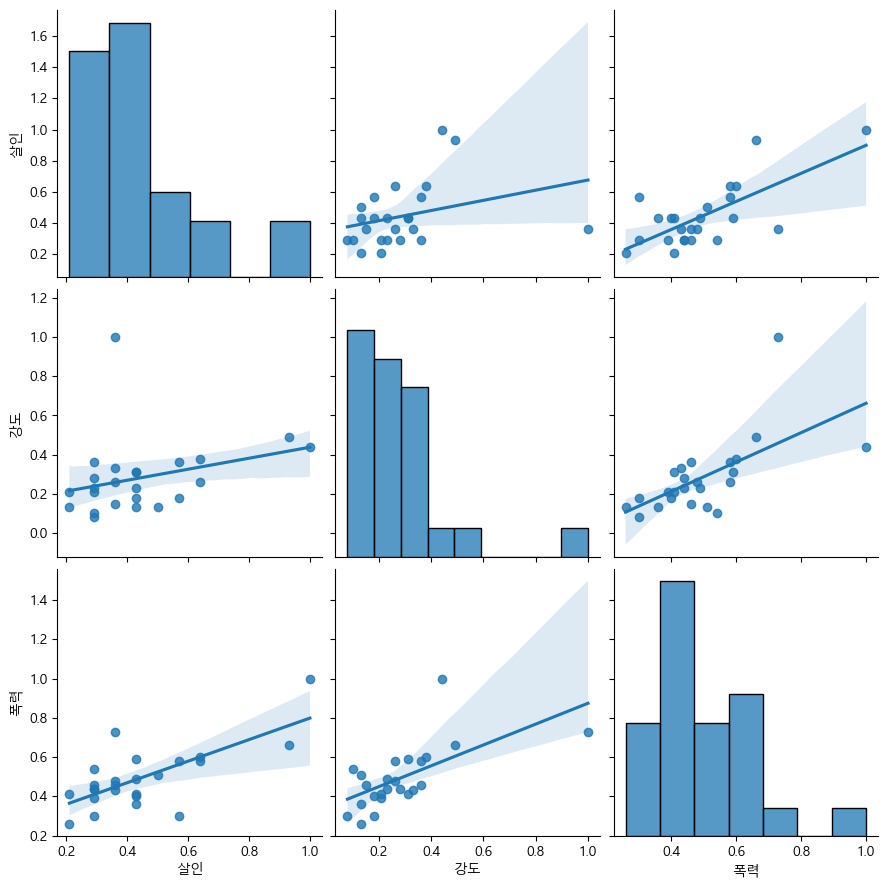

In [80]:
# pairplot() 강도, 살인, 폭력에 대해서 상관관계가 있는지 확인

sns.pairplot(data = crime_anal_norm, vars = ['살인', '강도', '폭력'], kind = 'reg', height = 3)
plt.show()

결과 해석

1. 상대적으로 폭력사건이 살인으로 이어진 경우보다 강도사건이 살인으로 이어지는 것보다 더 많음
2. 강도와 폭력은 상관관계가 매우 높다


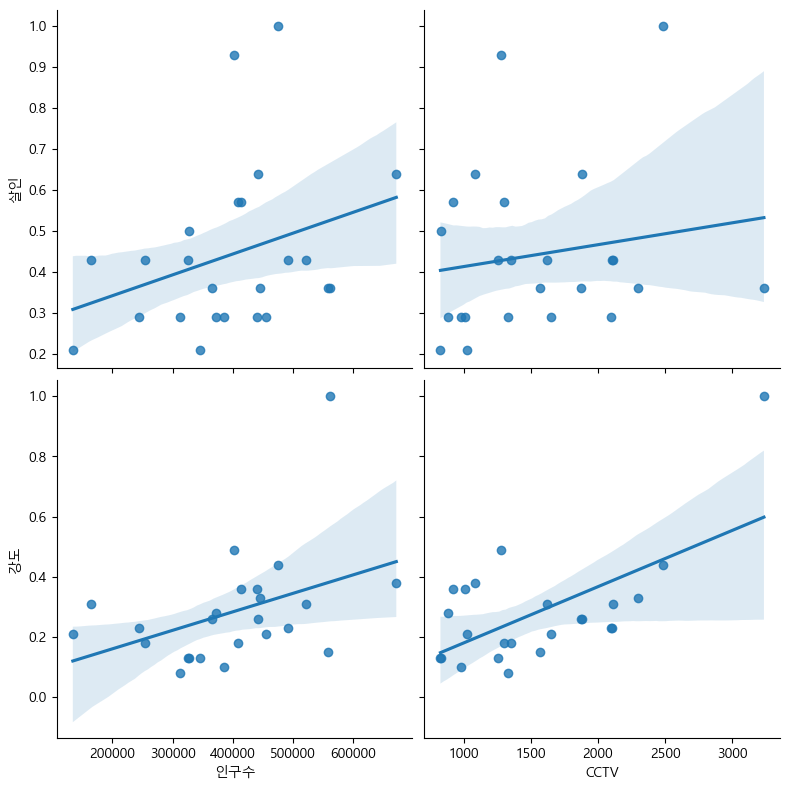

In [81]:
# 인구수, cctv 와 살인, 강도 상관관계 확인

sns.pairplot(
    data = crime_anal_norm,
    x_vars = ['인구수', 'CCTV'],
    y_vars = ['살인', '강도'],
    kind = 'reg',
    height = 4
)
plt.show()


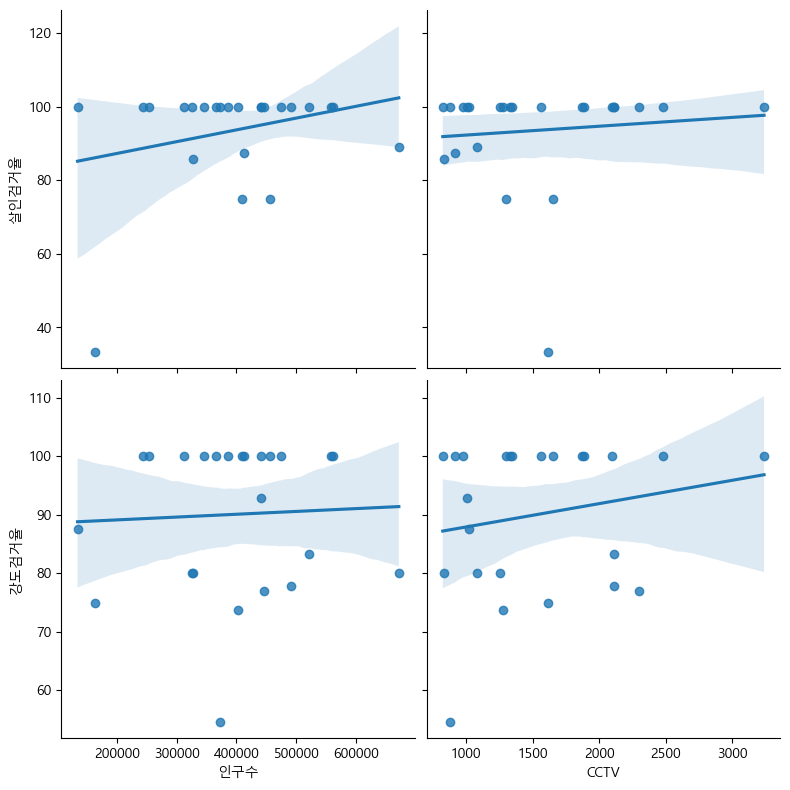

In [82]:
sns.pairplot(
    data = crime_anal_norm,
    x_vars = ['인구수', 'CCTV'],
    y_vars = ['살인검거율', '강도검거율'],
    kind = 'reg',
    height = 4
)
plt.show()

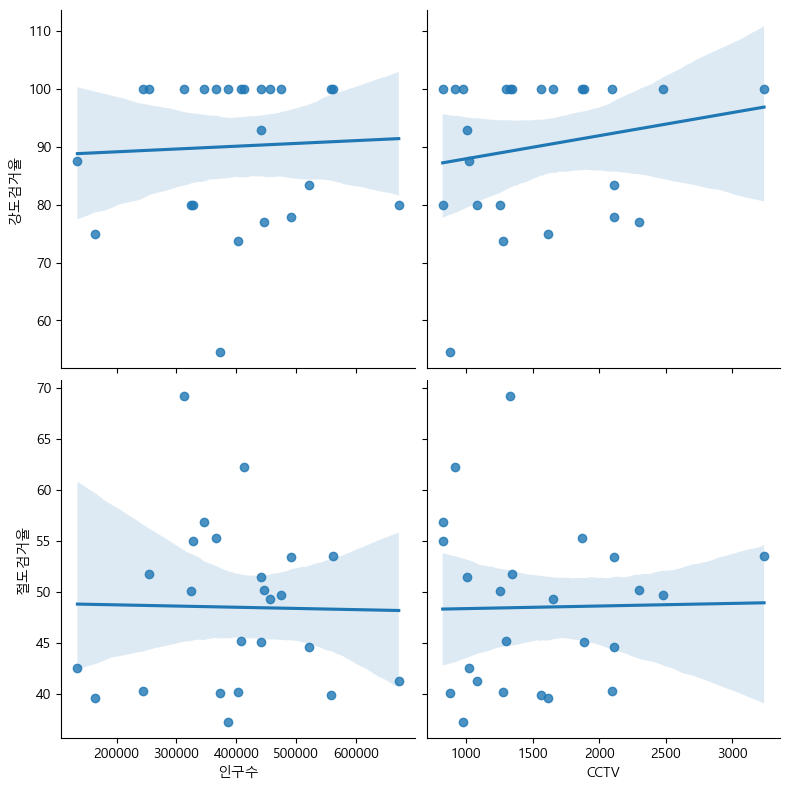

In [83]:
sns.pairplot(
    data = crime_anal_norm,
    x_vars = ['인구수', 'CCTV'],
    y_vars = ['강도검거율', '절도검거율'],
    kind = 'reg',
    height = 4
)
plt.show()

In [85]:
crime_anal_norm.columns

Index(['살인', '강도', '강간', '절도', '폭력', '강간검거율', '강도검거율', '살인검거율', '절도검거율',
       '폭력검거율', '인구수', 'CCTV', '범죄', '검거'],
      dtype='object')

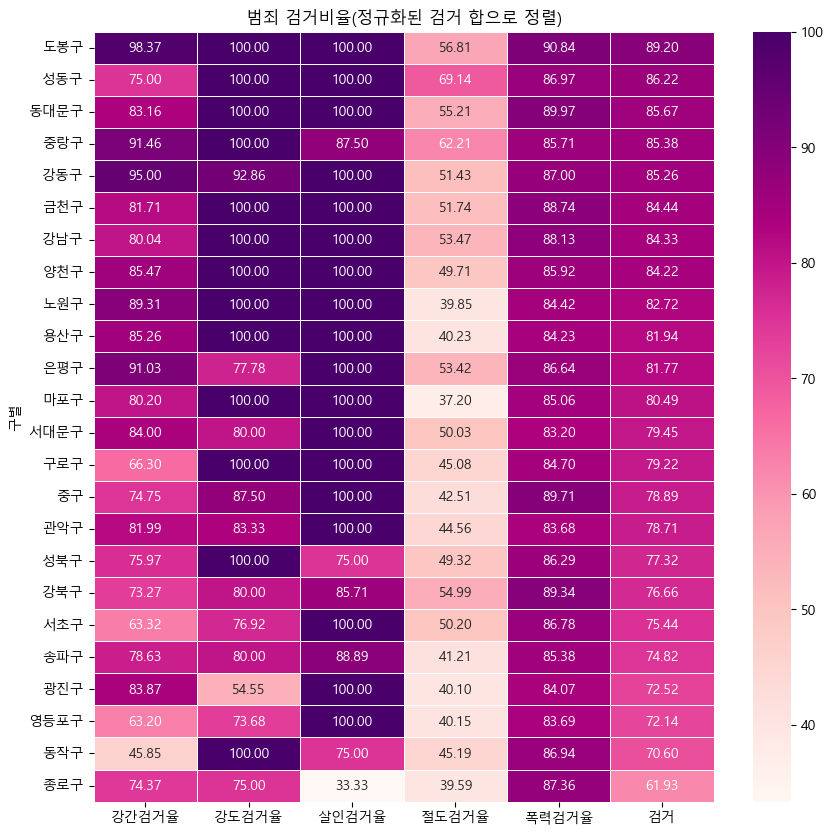

In [108]:
# 검거율 heatmap

# 대표값을 설정한 '검거' 컬럼 기준으로 정렬

def drawGraph() :
    
    # 데이터 프레임 생성
    target_col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율', '검거']
    
    crime_anal_norm_sort = crime_anal_norm.sort_values(by = '검거', ascending = False) # 내림차순 정렬
    
    # 그래프 생성
    plt.figure(figsize = (10, 10))
    sns.heatmap(
        data = crime_anal_norm_sort[target_col],
        annot = True,
        fmt = '.2f', # d : 정수, f : 실수
        linewidths = 0.5, # 간격 설정
        cmap = 'RdPu'
    )

    plt.title('범죄 검거비율(정규화된 검거 합으로 정렬)')
    plt.show()

drawGraph()


In [111]:
crime_anal_norm.sort_values(by = '검거', ascending = False)

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.21,0.13,0.24,0.24,0.26,98.37,100.00,100.00,56.81,90.84,346234,825,0.216,89.204
성동구,0.29,0.08,0.20,0.35,0.30,75.00,100.00,100.00,69.14,86.97,312711,1327,0.244,86.222
동대문구,0.36,0.26,0.37,0.53,0.48,83.16,100.00,100.00,55.21,89.97,366011,1870,0.400,85.668
중랑구,0.57,0.36,0.32,0.46,0.58,91.46,100.00,87.50,62.21,85.71,412780,916,0.458,85.376
강동구,0.29,0.36,0.31,0.48,0.46,95.00,92.86,100.00,51.43,87.00,440359,1010,0.380,85.258
금천구,0.43,0.18,0.34,0.34,0.40,81.71,100.00,100.00,51.74,88.74,253491,1348,0.338,84.438
강남구,0.36,1.00,1.00,0.98,0.73,80.04,100.00,100.00,53.47,88.13,561052,3238,0.814,84.328
양천구,1.00,0.44,0.79,1.00,1.00,85.47,100.00,100.00,49.71,85.92,475018,2482,0.846,84.220
노원구,0.36,0.15,0.31,0.51,0.46,89.31,100.00,100.00,39.85,84.42,558075,1566,0.358,82.716


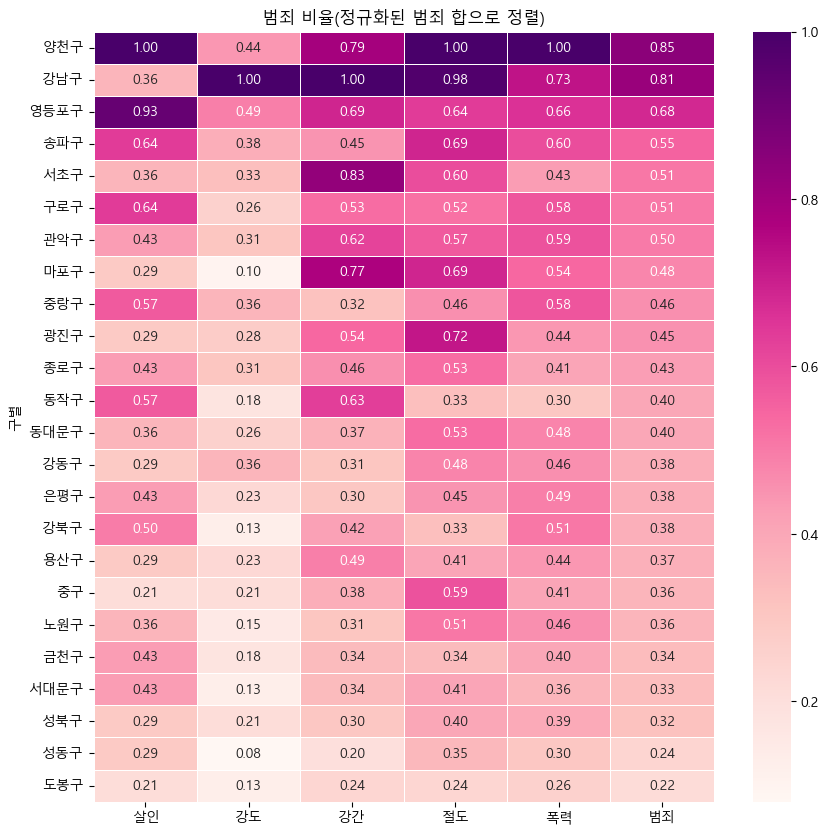

In [112]:
# 범죄 발생 건수 heatmap

# 범죄 컬럼 기준으로 정렬

def drawGraph() :
    
    # 데이터 프레임 생성
    target_col = ['살인', '강도', '강간', '절도', '폭력', '범죄']
    
    crime_anal_norm_sort = crime_anal_norm.sort_values(by = '범죄', ascending = False) # 내림차순 정렬
    
    # 그래프 생성
    plt.figure(figsize = (10, 10))
    sns.heatmap(
        data = crime_anal_norm_sort[target_col],
        annot = True,
        fmt = '.2f', # d : 정수, f : 실수
        linewidths = 0.5, # 간격 설정
        cmap = 'RdPu'
    )

    plt.title('범죄 비율(정규화된 범죄 합으로 정렬)')
    plt.show()

drawGraph()


결과해석

- 강남구 : 살인과 폭력을 제외한 1등
- 서초구 : 상위권, 검거율은 낮은데 범죄 발생 비율은 높음
- 강남, 송파, 서초(강남 3구) 과연 안전할까?



In [113]:
# 데이터 저장

crime_anal_norm.to_csv('crime_seoul_final.csv', sep = ',' , encoding='utf-8')

In [114]:
pd.read_csv('crime_seoul_final.csv')

,구별,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
0,강남구,0.36,1.00,1.00,0.98,0.73,80.04,100.00,100.00,53.47,88.13,561052,3238,0.814,84.328
1,강동구,0.29,0.36,0.31,0.48,0.46,95.00,92.86,100.00,51.43,87.00,440359,1010,0.380,85.258
2,강북구,0.50,0.13,0.42,0.33,0.51,73.27,80.00,85.71,54.99,89.34,328002,831,0.378,76.662
3,관악구,0.43,0.31,0.62,0.57,0.59,81.99,83.33,100.00,44.56,83.68,520929,2109,0.504,78.712
4,광진구,0.29,0.28,0.54,0.72,0.44,83.87,54.55,100.00,40.10,84.07,372298,878,0.454,72.518
5,구로구,0.64,0.26,0.53,0.52,0.58,66.30,100.00,100.00,45.08,84.70,441559,1884,0.506,79.216
6,금천구,0.43,0.18,0.34,0.34,0.40,81.71,100.00,100.00,51.74,88.74,253491,1348,0.338,84.438
7,노원구,0.36,0.15,0.31,0.51,0.46,89.31,100.00,100.00,39.85,84.42,558075,1566,0.358,82.716
8,도봉구,0.21,0.13,0.24,0.24,0.26,98.37,100.00,100.00,56.81,90.84,346234,825,0.216,89.204
9,동대문구,0.36,0.26,0.37,0.53,0.48,83.16,100.00,100.00,55.21,89.97,366011,1870,0.400,85.668
